In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np

titles = []
prices = []
ratings = []
features = []

for x in range(1, 45):
    start_time = time.time()
    
    URL = 'https://www.flipkart.com/search?q=laptops&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops%7CLaptops&requestId=4f05a4c0-94b5-4c3d-a0f0-6aa701cf94dc&as-searchtext=laptop&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page={}'.format(x)
    page = requests.get(URL)  # to get all data on the webpage
    soup = BeautifulSoup(page.content, 'html.parser')
    
    product_details = soup.find_all('div', class_='_3pLy-c row')
    
    for product in product_details:
    
        name = product.find('div', class_='_4rR01T')
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)

        price = product.find('div', class_='_30jeq3 _1_WHN1')
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)

        rating = product.find('div', class_='_3LWZlK')
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)

        f = []
        specifications = product.find('div', class_='fMghEO')
        specs = specifications.find_all('li', class_='rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
        
    end_time = time.time()

    print('Page {} completed in {} seconds'.format(x, end_time - start_time))


Page 1 completed in 15.582037448883057 seconds
Page 2 completed in 16.92734670639038 seconds
Page 3 completed in 15.669833183288574 seconds
Page 4 completed in 15.454582214355469 seconds
Page 5 completed in 19.8649742603302 seconds
Page 6 completed in 18.535176038742065 seconds
Page 7 completed in 20.055047512054443 seconds
Page 8 completed in 18.16052508354187 seconds
Page 9 completed in 16.89028549194336 seconds
Page 10 completed in 16.59967589378357 seconds
Page 11 completed in 15.434539794921875 seconds
Page 12 completed in 16.208540201187134 seconds
Page 13 completed in 16.969374179840088 seconds
Page 14 completed in 23.196533679962158 seconds
Page 15 completed in 16.400689601898193 seconds
Page 16 completed in 16.303128004074097 seconds
Page 17 completed in 16.70078682899475 seconds
Page 18 completed in 16.69247603416443 seconds
Page 19 completed in 17.639338731765747 seconds
Page 20 completed in 17.78982710838318 seconds
Page 21 completed in 17.06141424179077 seconds
Page 22 com

In [3]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(features))

960
960
960
960


In [4]:
print(titles[:5])
print('\n')
print(prices[:5])
print('\n')
print(ratings[:5])
print('\n')
features[:5]

['ASUS Chromebook Flip Touch Intel Celeron Dual Core N4020 - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-...', 'MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/AMD Radeon ...', 'ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4 - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312W Thin ...', 'Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A', 'HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 GB SSD/Windows 11 Home) 15s-du3595TU Thin and Light Lapto...']


['₹29,431', '₹45,990', '₹28,990', '₹66,999', '₹32,990']


['4', '4.1', '4.3', '4.7', nan]




[['Intel Celeron Dual Core Processor',
  '4 GB LPDDR4 RAM',
  'Chrome Operating System',
  '29.46 cm (11.6 inch) Touchscreen Display',
  '1 Year Onsite Warranty'],
 ['AMD Ryzen 5 Hexa Core Processor',
  '8 GB DDR5 RAM',
  'Windows 11 Operating System',
  '512 GB SSD',
  '39.62 cm (15.6 inch) Display',
  '1 Year Carry-in Warranty'],
 ['Intel Core i3 Processor (11th Gen)',
  '8 GB DDR4 RAM',
  '64 bit Windows 11 Operating System',
  '256 GB SSD',
  '39.62 cm (15.6 Inch) Display',
  'Not Applicable',
  '1 Year Onsite Warranty'],
 ['Apple M1 Processor',
  '8 GB DDR4 RAM',
  'Mac OS Operating System',
  '256 GB SSD',
  '33.78 cm (13.3 inch) Display',
  'Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player',
  '1 Year Limited Warra\xadnty'],
 ['Intel Core i3 Processor 

In [5]:
# create a dataframe
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'Features'     : features}
df = pd.DataFrame(data)
df.head(10)

,Product_name,Price,Rating,Features
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,"₹29,431",4,"[Intel Celeron Dual Core Processor, 4 GB LPDDR..."
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,"₹45,990",4.1,"[AMD Ryzen 5 Hexa Core Processor, 8 GB DDR5 RA..."
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,"₹28,990",4.3,"[Intel Core i3 Processor (11th Gen), 8 GB DDR4..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,"₹66,999",4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,"₹32,990",NaN,"[Intel Core i3 Processor (11th Gen), 8 GB DDR4..."
5,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,"₹28,990",4.2,"[Intel Core i3 Processor (11th Gen), 8 GB DDR4..."
6,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,"₹37,527",4.2,"[Intel Core i3 Processor (12th Gen), 8 GB DDR4..."
7,HP Pavilion AMD Ryzen 5 Hexa Core 5625U - (8 G...,"₹50,990",4.4,"[AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA..."
8,HP 2023 AMD Ryzen 3 Dual Core 3250U - (8 GB/51...,"₹28,990",4.2,"[AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RA..."
9,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,"₹35,290",4.2,"[Intel Core i3 Processor (12th Gen), 8 GB DDR4..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  960 non-null    object
 1   Price         960 non-null    object
 2   Rating        810 non-null    object
 3   Features      960 non-null    object
dtypes: object(4)
memory usage: 30.1+ KB


In [7]:
df.to_csv('Flipkart_desktop.csv')

### Data cleaning process

In [8]:
# Converting rating to float
df.Rating = df.Rating.astype(float)

# Converting price to float
df['Price'] = df['Price'].astype(str).apply(lambda s: float(s.replace('₹','').replace(',','')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  960 non-null    object 
 1   Price         960 non-null    float64
 2   Rating        810 non-null    float64
 3   Features      960 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.1+ KB


In [9]:
#converting rating to float
df.Rating = df.Rating.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  960 non-null    object 
 1   Price         960 non-null    float64
 2   Rating        810 non-null    float64
 3   Features      960 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.1+ KB


In [10]:
df.head()

,Product_name,Price,Rating,Features
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"[Intel Celeron Dual Core Processor, 4 GB LPDDR..."
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"[AMD Ryzen 5 Hexa Core Processor, 8 GB DDR5 RA..."
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"[Intel Core i3 Processor (11th Gen), 8 GB DDR4..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"[Intel Core i3 Processor (11th Gen), 8 GB DDR4..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  960 non-null    object 
 1   Price         960 non-null    float64
 2   Rating        810 non-null    float64
 3   Features      960 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.1+ KB


In [12]:
# convert the feature in string(to work with regular expressions)
df.Features = df.Features.apply(lambda x: ','.join(x))
df.head()

,Product_name,Price,Rating,Features
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ..."
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,..."
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat..."
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R..."


In [13]:
# to extract processor
df.Features[0]

'Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty'

In [14]:
def get_ram(text): 
    pattern = r'\b\d+\s*GB\s*DDR4\s*RAM\b'

    # Use re.search to find the matching pattern in the text
    match = re.search(pattern, text)

    # Extract the RAM information if match found
    if match:
        ram_info = match.group()
        return ram_info
    else:
        return np.nan
get_ram(df.Features[0])

nan

In [15]:
df['RAM'] = df.Features.apply(get_ram)
df.head()

,Product_name,Price,Rating,Features,RAM
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM


In [16]:
df.head()

,Product_name,Price,Rating,Features,RAM
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM


In [17]:
df['Features'][0]

'Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty'

In [18]:
def get_processor(text): 
    processor_regex = re.compile(r'Processor \([^)]+\)')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0]
get_processor(df.Features[0])

nan

In [19]:
df['Processor'] = df.Features.apply(get_processor)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN,NaN
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN,NaN
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen)
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen)


In [20]:
def get_operating_system(text): 
    os_regex = re.compile(r'Windows \d+ Operating System')
    os_match = os_regex.search(text)
    if os_match:
        return os_match.group()
    else:
        return np.nan
get_operating_system(df.Features[0])

nan

In [21]:
df['operating system'] = df.Features.apply(get_operating_system)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN,NaN,NaN
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN,NaN,Windows 11 Operating System
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System


In [22]:
df['Features'][0]

'Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty'

In [23]:
def get_ssd(text): 
    ssd_regex = re.compile(r'\d+ GB SSD')
    ssd_match = ssd_regex.search(text)
    if ssd_match:
        return ssd_match.group()
    else:
        return np.nan
get_ssd(df.Features[0])

nan

In [24]:
df['SSD'] = df.Features.apply(get_ssd)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN,NaN,NaN,NaN
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN,NaN,Windows 11 Operating System,512 GB SSD
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD


In [25]:
df['Features'][0]

'Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty'

In [26]:
def get_display(text):
    regex = re.compile(r'\((.*?)\) ([A-Za-z0-9\s\+]+) Display')
    display_match = regex.search(text)

    if display_match:
        display_info = display_match.group(0)
        return display_info.replace("'", "").replace('"', '')  
    else:
        return np.nan
get_display(df.Features[0])

'(11.6 inch) Touchscreen Display'

In [27]:
df['Display'] = df.Features.apply(get_display)

In [28]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Display
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN,NaN,NaN,NaN,(11.6 inch) Touchscreen Display
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN,NaN,Windows 11 Operating System,512 GB SSD,NaN
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,NaN
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,NaN


In [29]:
df['Features'][0]

'Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty'

In [30]:
def get_warranty(text): 
    warranty_regex = re.compile(r'\d+ Year ([A-Za-z0-9\s\+]+) Warranty')
    warranty_match = warranty_regex.search(text)
    if warranty_match:
        return warranty_match.group()
    else:
        return np.nan
get_warranty(df.Features[0])

'1 Year Onsite Warranty'

In [31]:
df['Warranty'] = df.Features.apply(get_warranty)

In [32]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Display,Warranty
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",NaN,NaN,NaN,NaN,(11.6 inch) Touchscreen Display,1 Year Onsite Warranty
1,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,45990.0,4.1,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR5 RAM,...",NaN,NaN,Windows 11 Operating System,512 GB SSD,NaN,NaN
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,NaN,1 Year Onsite Warranty
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN,NaN
4,HP Intel Core i3 11th Gen 1125G4 - (8 GB/256 G...,32990.0,NaN,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,NaN,1 Year Onsite Warranty


In [33]:
df.to_csv('Flipkart_desktops.csv')

### Data cleaning

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      984 non-null    object 
 1   Price             984 non-null    float64
 2   Rating            829 non-null    float64
 3   Features          984 non-null    object 
 4   RAM               645 non-null    object 
 5   Processor         616 non-null    object 
 6   operating system  890 non-null    object 
 7   SSD               762 non-null    object 
 8   Display           86 non-null     object 
 9   Warranty          614 non-null    object 
dtypes: float64(2), object(8)
memory usage: 77.0+ KB


In [50]:
df['Display']

0                        (11.6 inch) Touchscreen Display
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
979    (13th Gen),16 GB DDR4X RAM,Windows 11 Operatin...
980                                                  NaN
981                                                  NaN
982                                                  NaN
983                                                  NaN
Name: Display, Length: 984, dtype: object

In [51]:
df = df.drop('Display', axis=1)

In [52]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'Processor',
       'operating system', 'SSD', 'Warranty'],
      dtype='object')

In [53]:
df.Price.replace(np.nan, df.Price.mean().round(1), inplace = True)
df.Rating.replace(np.nan, df.Rating.mean().round(1), inplace = True)
df.RAM.replace(np.nan, df.RAM.mode()[0], inplace = True)
df.Warranty.replace(np.nan, df.Warranty.mode()[0], inplace = True)
df.SSD.replace(np.nan, df.SSD.mode()[0], inplace = True)
df.Processor.replace(np.nan, df.Processor.mode()[0], inplace = True)
df['operating system'].replace(np.nan, df['operating system'].mode()[0], inplace = True)


In [54]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Warranty
0,ASUS Chromebook Flip Touch Intel Celeron Dual ...,29431.0,4.0,"Intel Celeron Dual Core Processor,4 GB LPDDR4 ...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty
1,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,45990.0,4.3,"AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.3,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,1 Year Onsite Warranty
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,66999.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,256 GB SSD,1 Year Onsite Warranty
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,28990.0,4.2,"Intel Core i3 Processor (11th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,1 Year Onsite Warranty


### Data visualisation

In [55]:
df.describe()

,Price,Rating
count,984.000000,984.000000
mean,63952.156504,4.197256
std,46955.731633,0.238601
min,20980.000000,1.700000
25%,36865.250000,4.100000
50%,50744.500000,4.200000
75%,66990.000000,4.300000
max,449990.000000,5.000000


### Univariate

C:\Users\DX\AppData\Local\Temp\ipykernel_6808\3811883525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


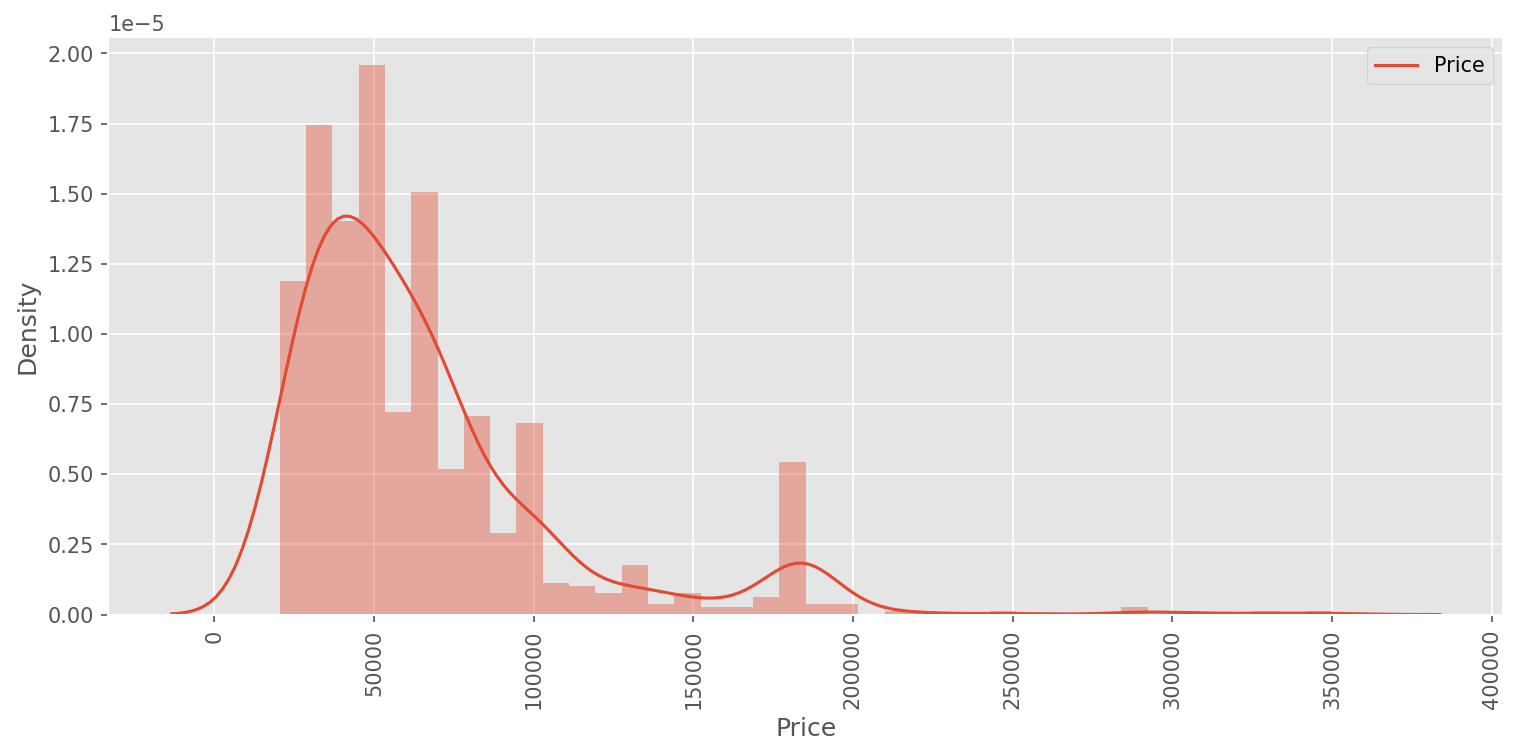

In [40]:
plt.figure(figsize=(12, 5), dpi=150)
sns.distplot(df['Price'])  
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(['Price'], loc='best')  # Add legend to the plot with the label 'Rating'
plt.show()

C:\Users\DX\AppData\Local\Temp\ipykernel_11692\2164191112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


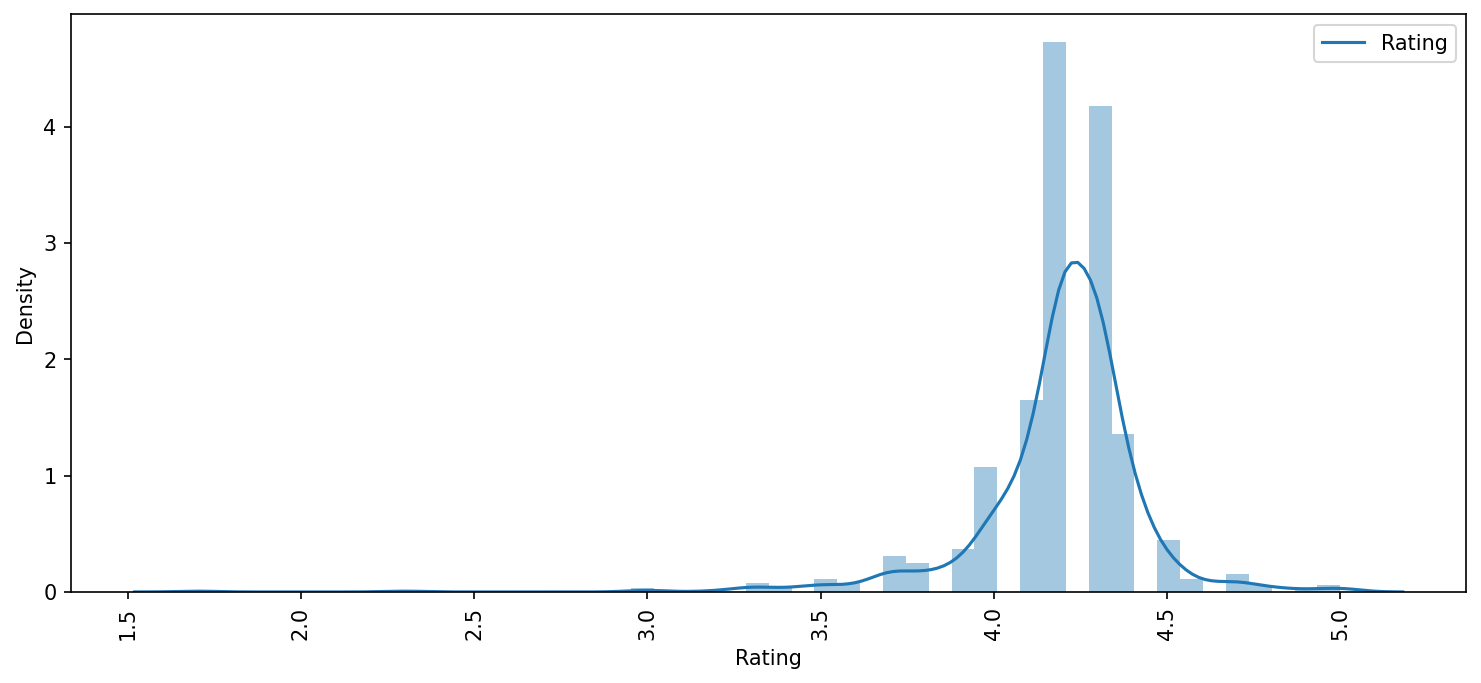

In [56]:
plt.figure(figsize=(12, 5), dpi=150)
sns.distplot(df['Rating'])  
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(['Rating'], loc='best')  # Add legend to the plot with the label 'Rating'
plt.show()

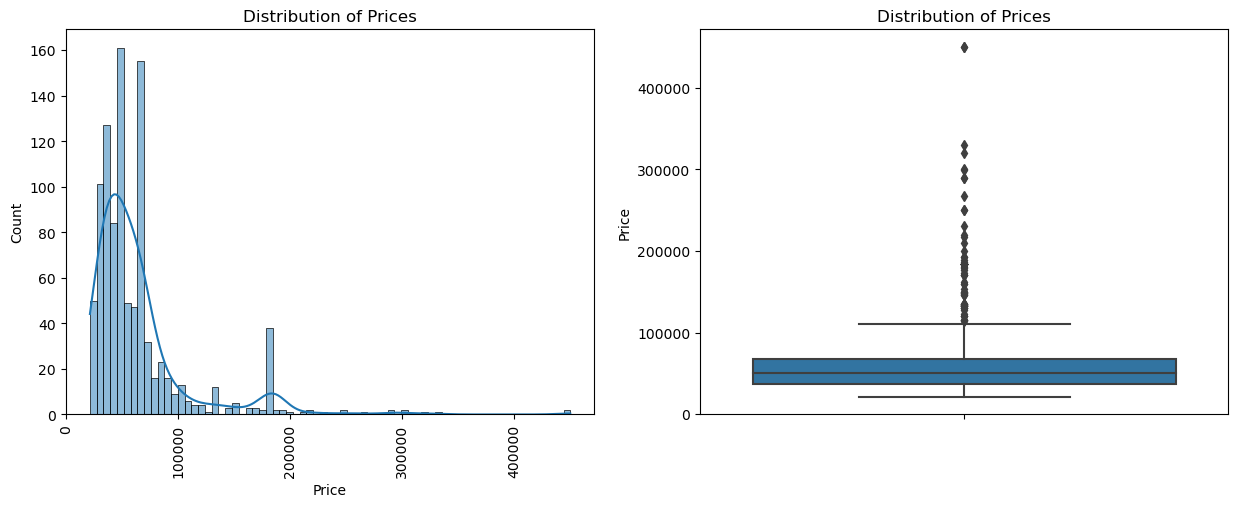

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, '8 GB DDR4 RAM'),
  Text(1, 0, '16 GB DDR4 RAM'),
  Text(2, 0, '4 GB DDR4 RAM'),
  Text(3, 0, '32 GB DDR4 RAM')])

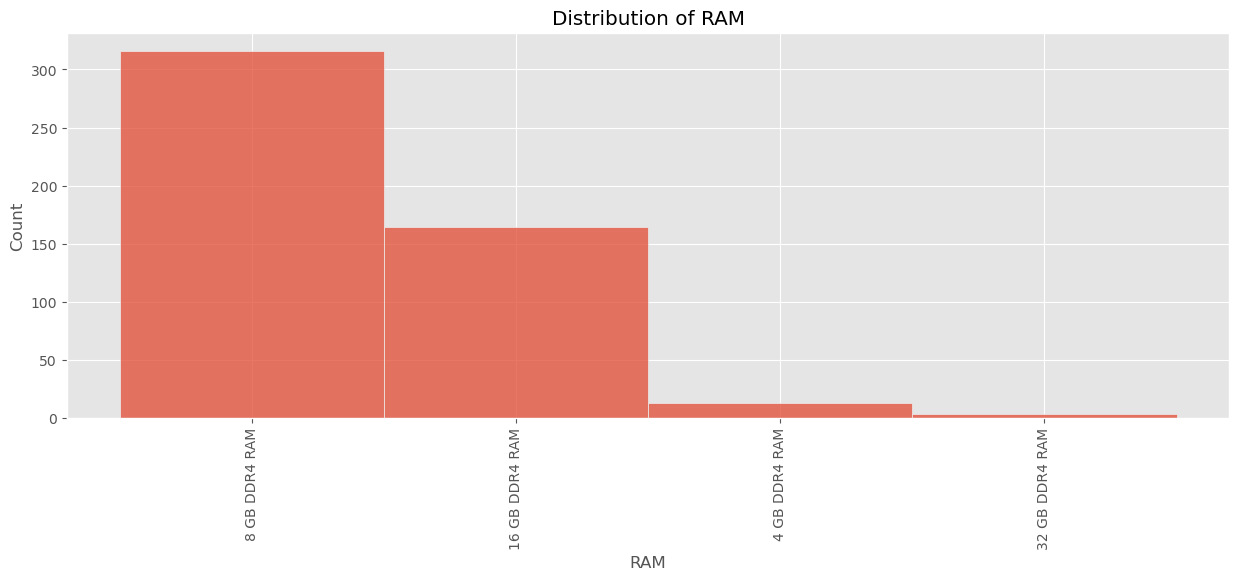

In [42]:
plt.figure(figsize=(15, 5))
sns.histplot(df['RAM'], kde=False)
plt.title('Distribution of RAM')
plt.xticks(rotation=90)



### Bivariate

C:\Users\DX\AppData\Local\Temp\ipykernel_11692\1194974384.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['Price'], hist=False, label='Price Distribution')


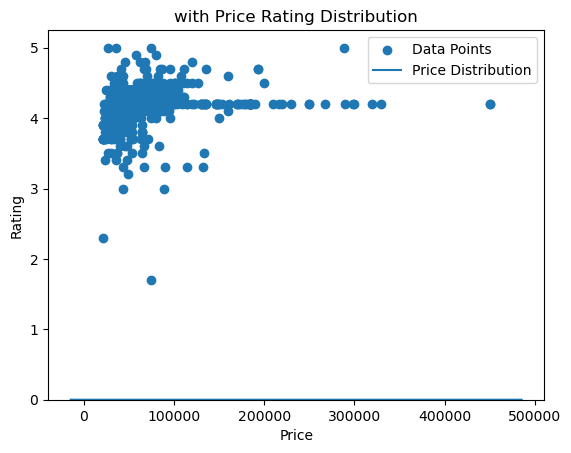

In [73]:

# Plot scatter plot
plt.scatter(x=df['Price'], y=df['Rating'], label='Data Points')

# Plot distribution plot
sns.distplot(x= df['Price'], hist=False, label='Price Distribution')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('with Price Rating Distribution')

# Add legend
plt.legend()

# Show plot
plt.show()


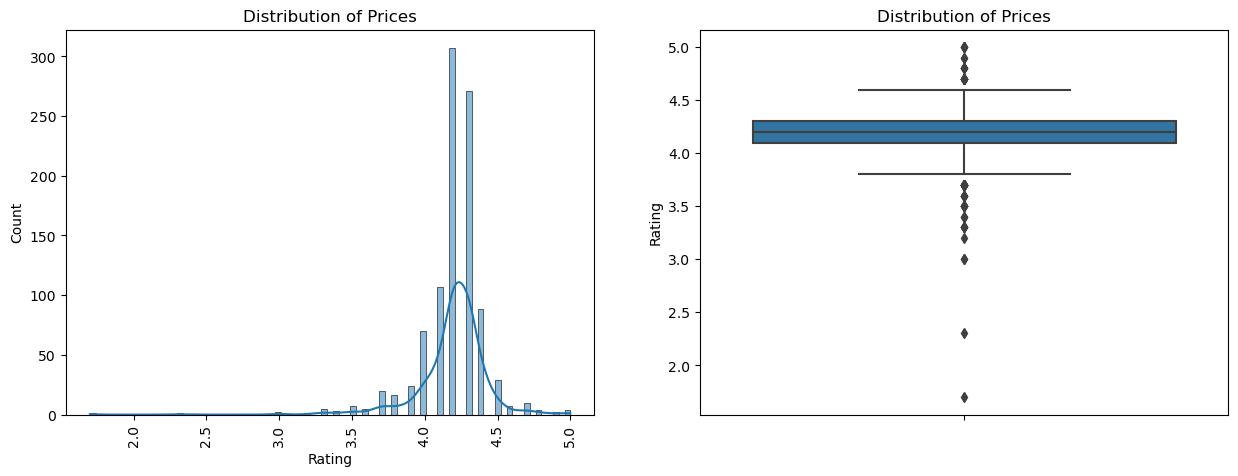

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rating'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()


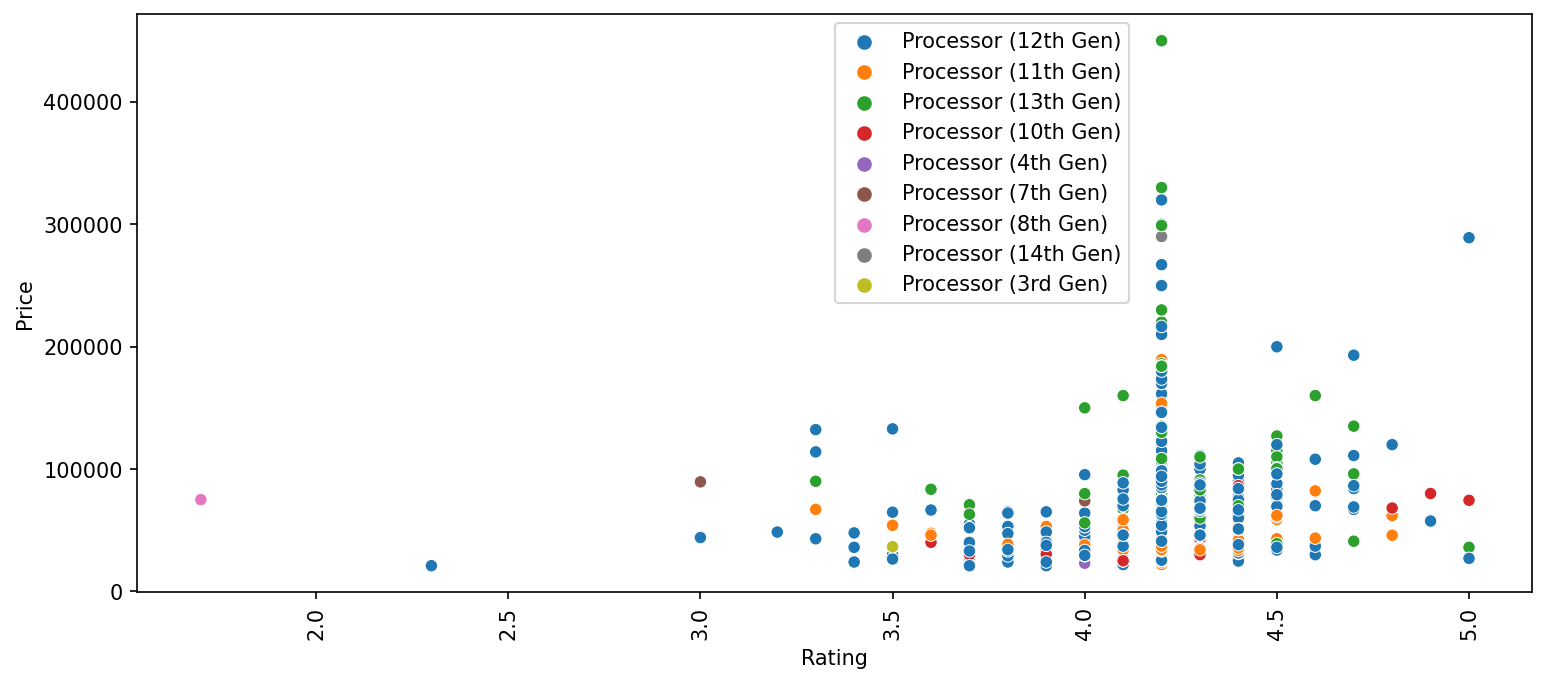

In [59]:
plt.figure(figsize=(12, 5), dpi=150)
sns.scatterplot(x='Rating', y='Price', data=df, hue='Processor')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(loc=(0.5,.5))  # Add legend to the plot
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Processor (12th Gen)'),
  Text(1, 0, 'Processor (11th Gen)'),
  Text(2, 0, 'Processor (13th Gen)'),
  Text(3, 0, 'Processor (10th Gen)'),
  Text(4, 0, 'Processor (4th Gen)'),
  Text(5, 0, 'Processor (7th Gen)'),
  Text(6, 0, 'Processor (8th Gen)'),
  Text(7, 0, 'Processor (14th Gen)'),
  Text(8, 0, 'Processor (3rd Gen)')])

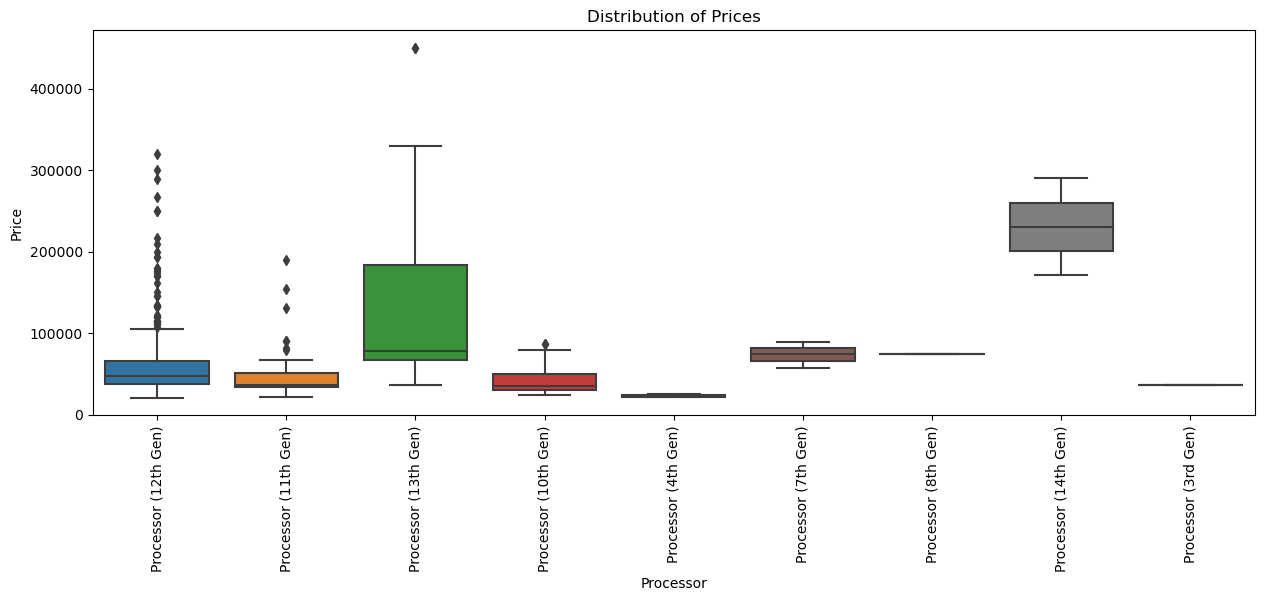

In [60]:
plt.figure(figsize=(15, 5))

sns.boxplot(y=df['Price'], x=df['Processor'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)


processor 13th generation  price is high.

(array([0, 1, 2, 3]),
 [Text(0, 0, '8 GB DDR4 RAM'),
  Text(1, 0, '16 GB DDR4 RAM'),
  Text(2, 0, '4 GB DDR4 RAM'),
  Text(3, 0, '32 GB DDR4 RAM')])

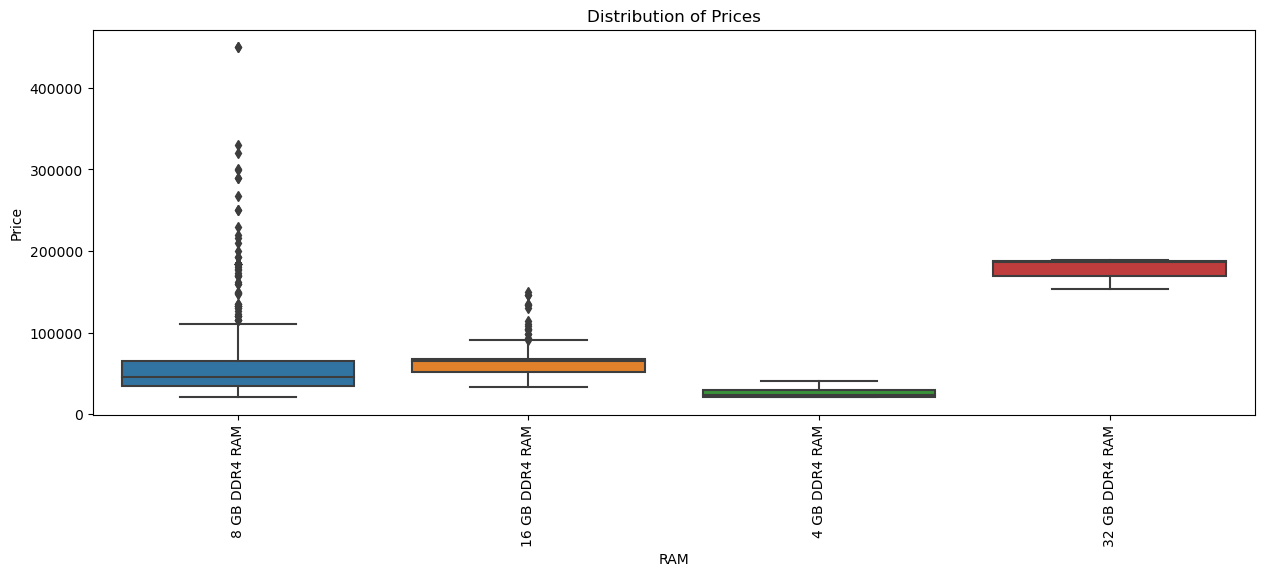

In [61]:
plt.figure(figsize=(15, 5))

sns.boxplot(y=df['Price'], x=df['RAM'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)


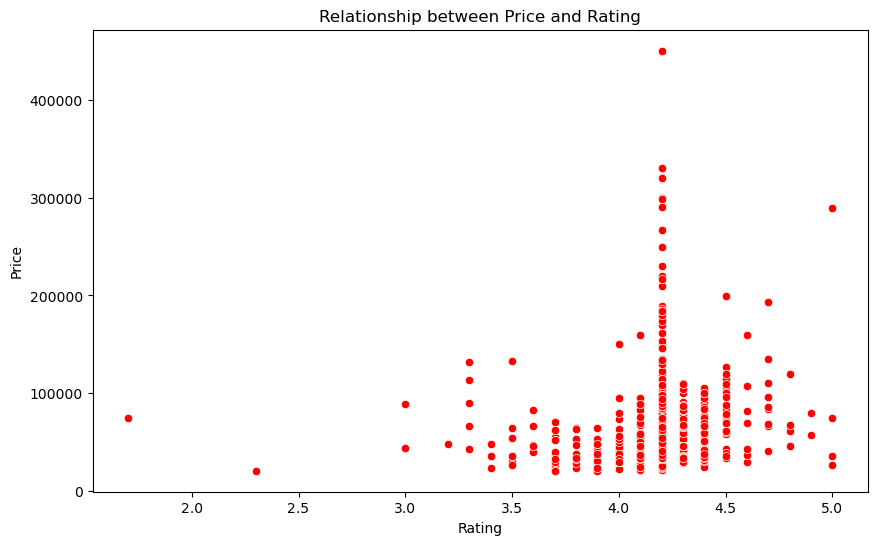

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', data=df, color='Red')
plt.title('Relationship between Price and Rating')
plt.show()

most of the products rating falls under 4.2

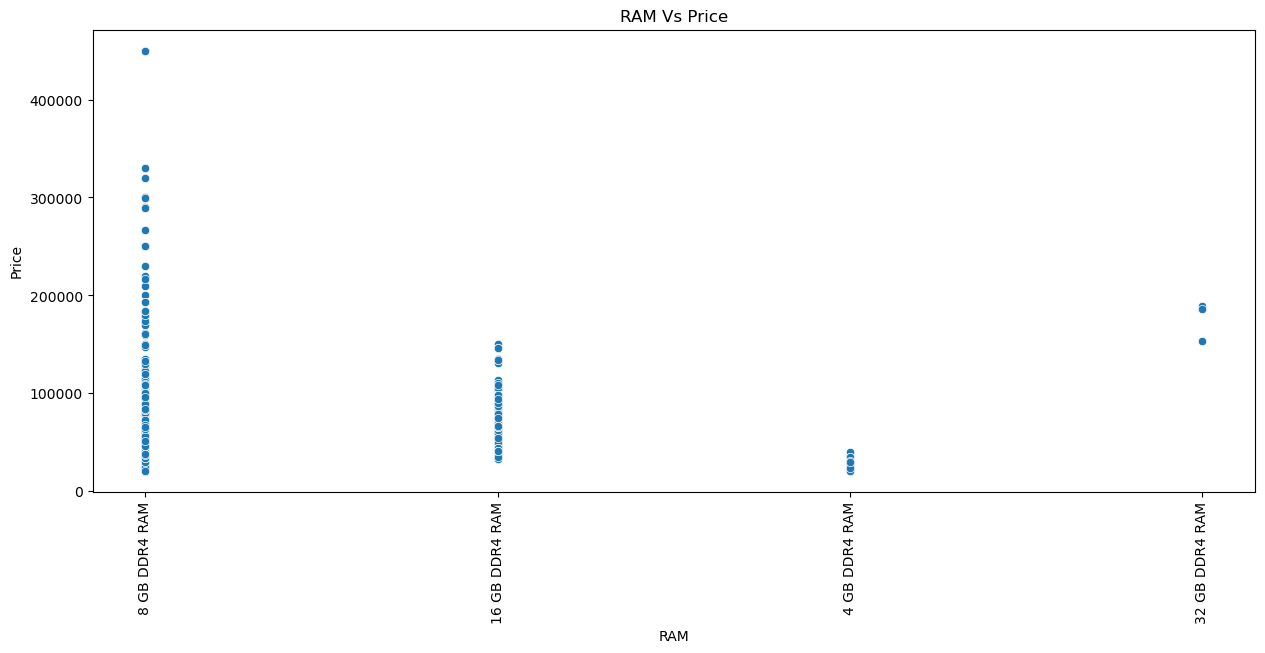

In [65]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='RAM', y='Price', data=df)
plt.title('RAM Vs Price')
plt.xticks(rotation=90)
plt.show()

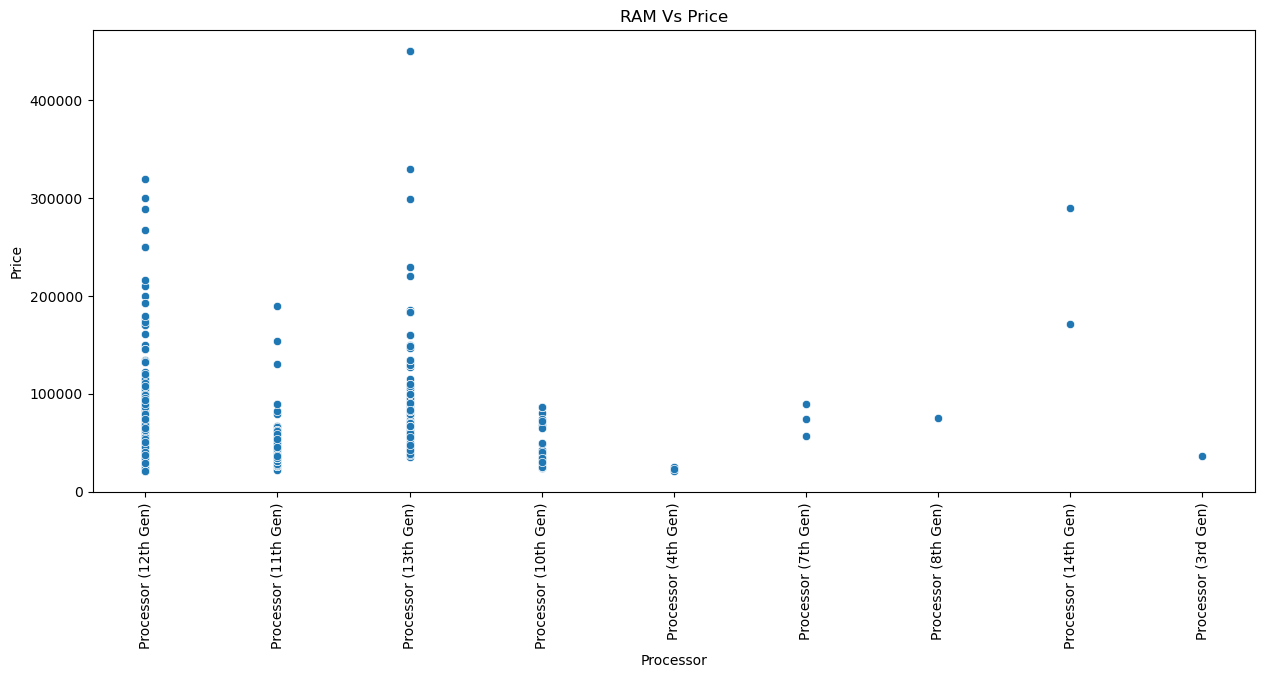

In [66]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Processor', y='Price', data=df)
plt.title('RAM Vs Price')
plt.xticks(rotation=90)
plt.show()

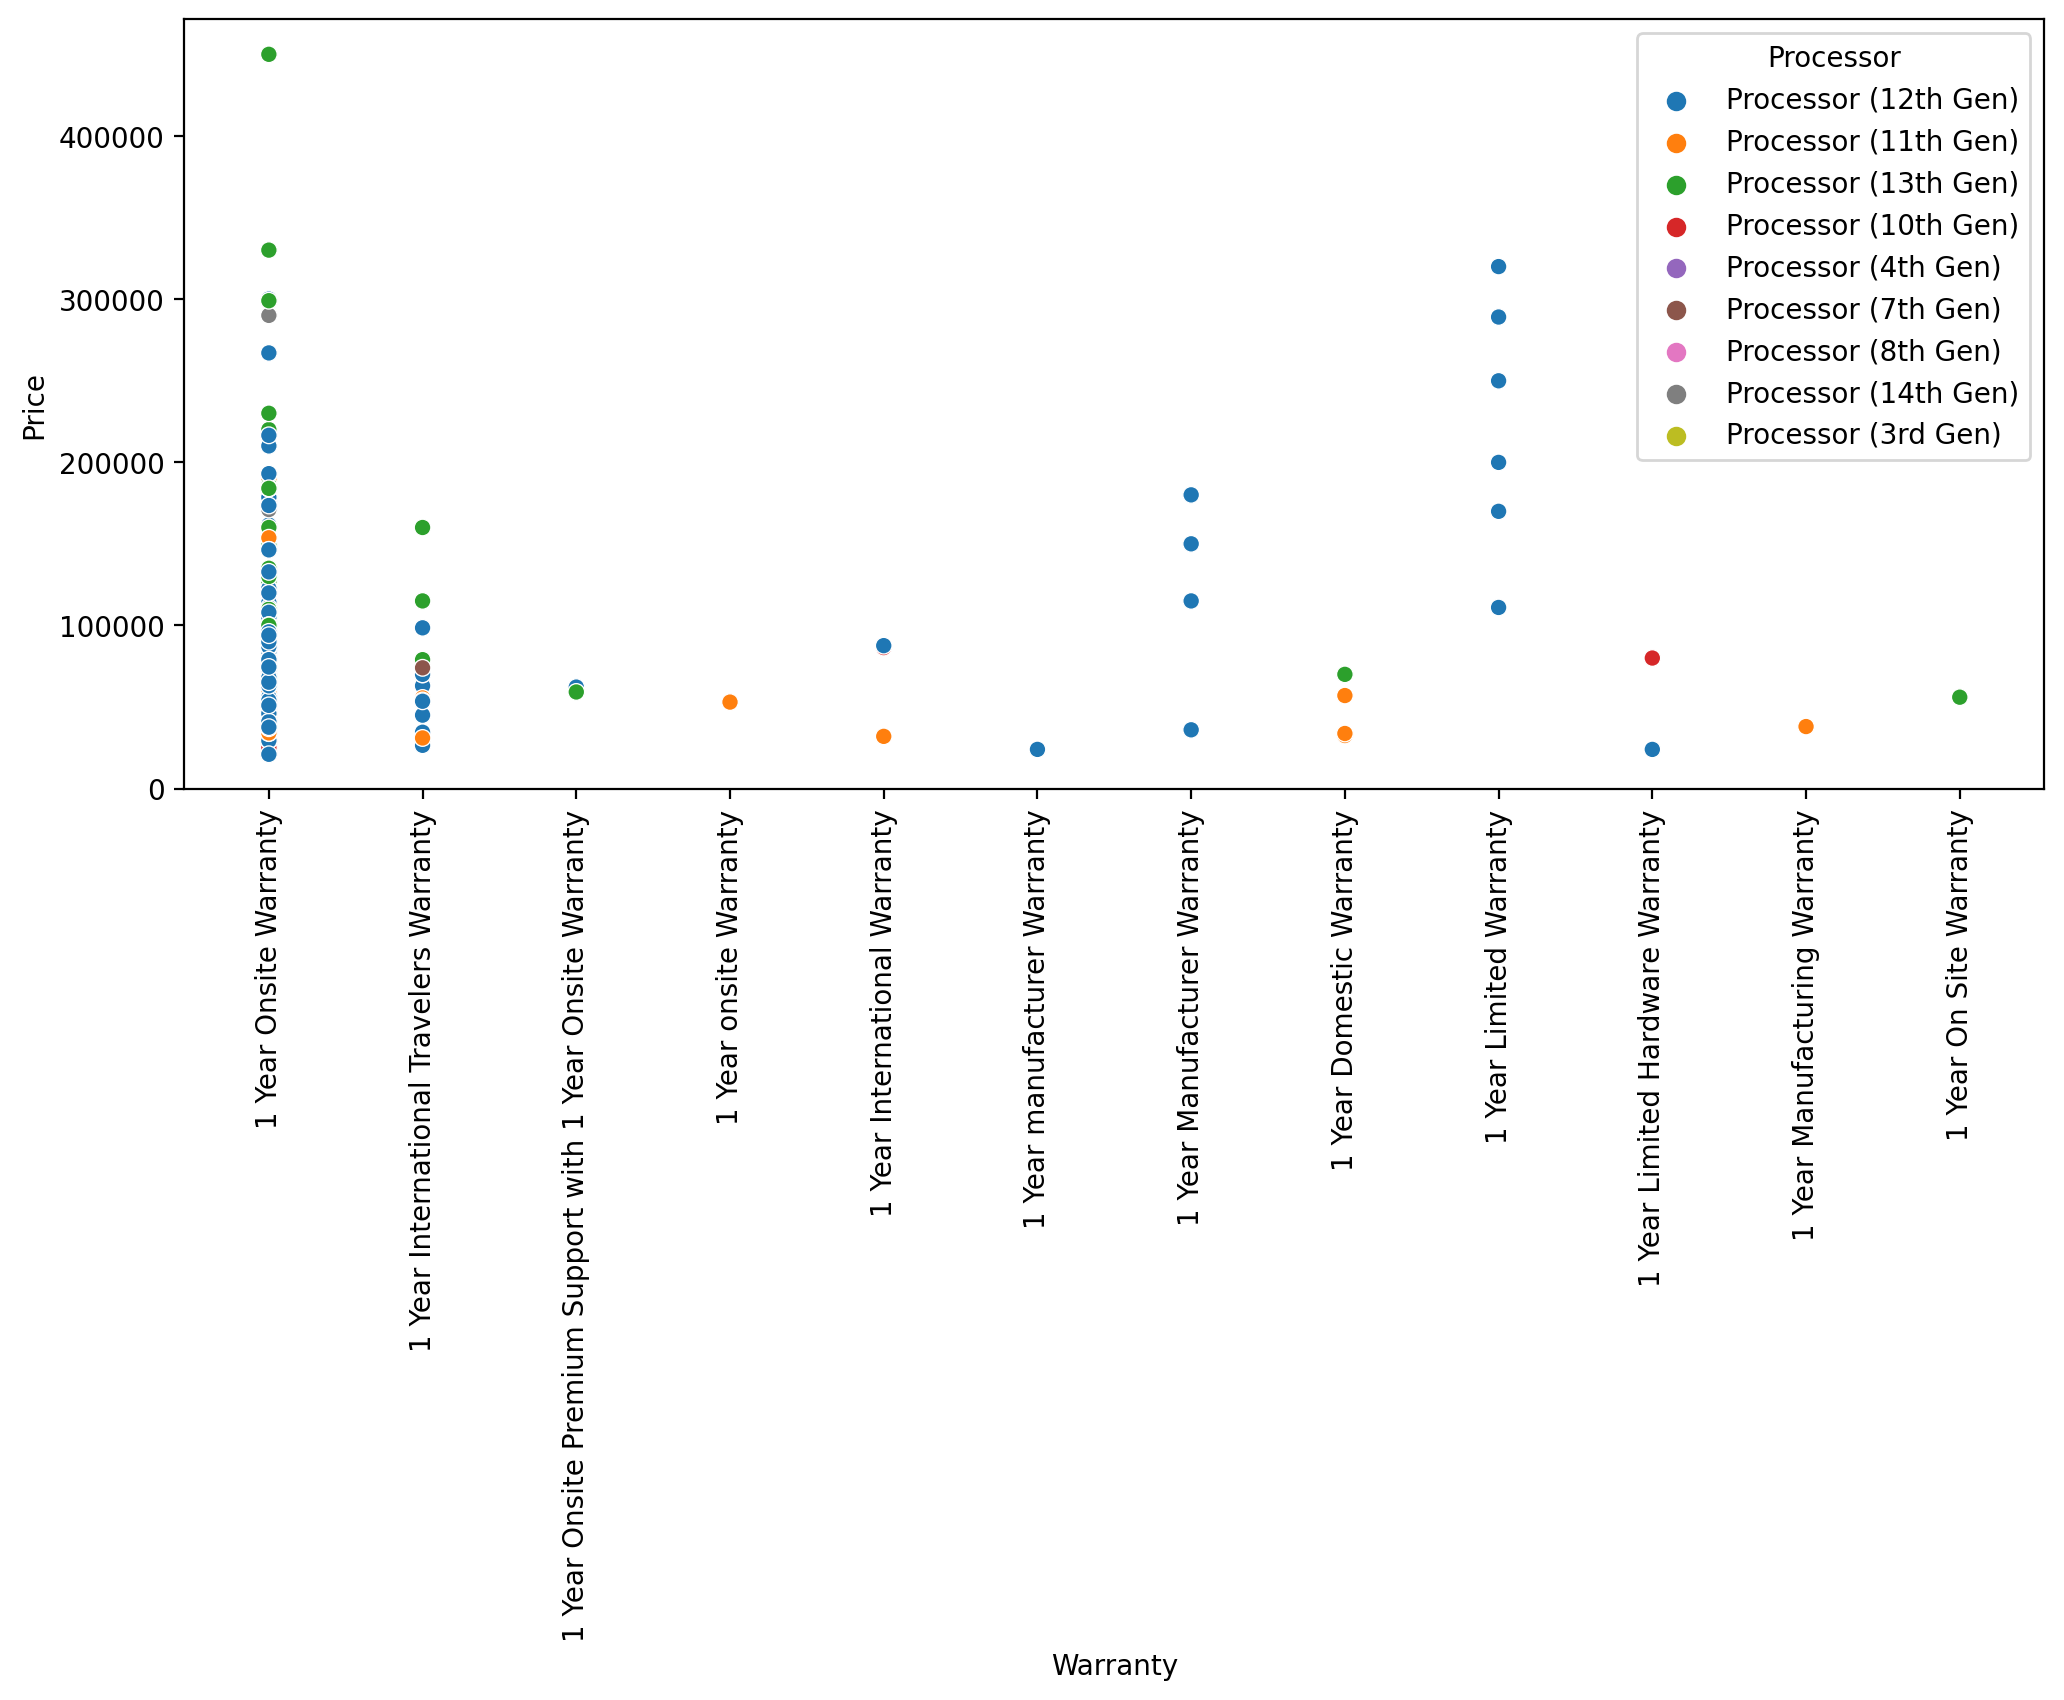

In [67]:
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Price', x=df['Warranty'], data=df, hue=df['Processor'])
plt.xticks(rotation=90)
plt.show()

In [1]:
# price vs Price
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Rating'],y='Price' , data=df)
plt.title('Rating vs Price')
plt.xticks(rotation =90)
plt.show()


NameError: name 'plt' is not defined

In [68]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'Processor',
       'operating system', 'SSD', 'Warranty'],
      dtype='object')

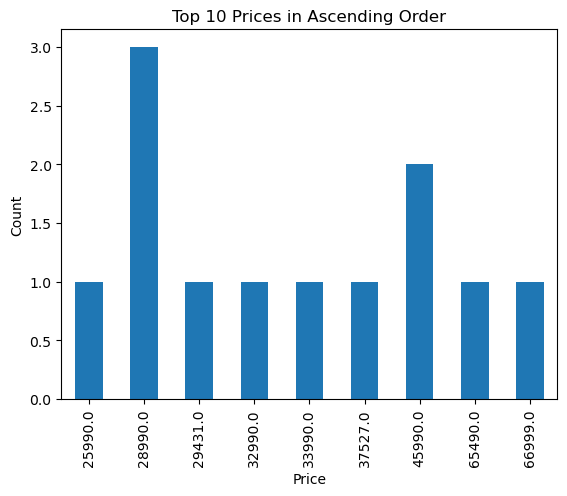

In [117]:
df['Price'][:12].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Top 10 Prices in Ascending Order')
plt.show()


In [34]:
# Sort the DataFrame by 'Rating' column in descending order and select top 10 rows
top_10_ratings = df.sort_values(by='Rating', ascending=False).head(10)

# Sort the top 10 rows by 'Price' column to identify the prices with the highest rating
top_10_prices_highest_rating = top_10_ratings.sort_values(by='Price', ascending=False)

print("Top 10 prices with the highest rating:")
print(top_10_prices_highest_rating[['Price', 'Rating']])


Top 10 prices with the highest rating:
        Price  Rating
669  222990.0     4.8
382  119900.0     4.8
223  109990.0     4.8
765   97990.0     5.0
269   81990.0     5.0
524   68071.0     4.8
192   57490.0     4.9
609   56980.0     5.0
725   56980.0     5.0
681   26990.0     5.0


In [36]:
# Retrieve the product with the highest price among the top 10 items with the highest rating
product_highest_price = top_10_prices_highest_rating.iloc[0]

print("Product with the highest price among the top 10 items with the highest rating:")
print(product_highest_price)


Product with the highest price among the top 10 items with the highest rating:
Product_name        Apple 2021 Macbook Pro Apple M1 Pro - (16 GB/1...
Price                                                        222990.0
Rating                                                            4.8
Features            Apple M1 Pro Processor,16 GB Unified Memory RA...
RAM                                                               NaN
Processor                                                         NaN
operating system                                                  NaN
SSD                                                               NaN
Display                                                           NaN
Warranty                                      1 Year Limited Warranty
Name: 669, dtype: object


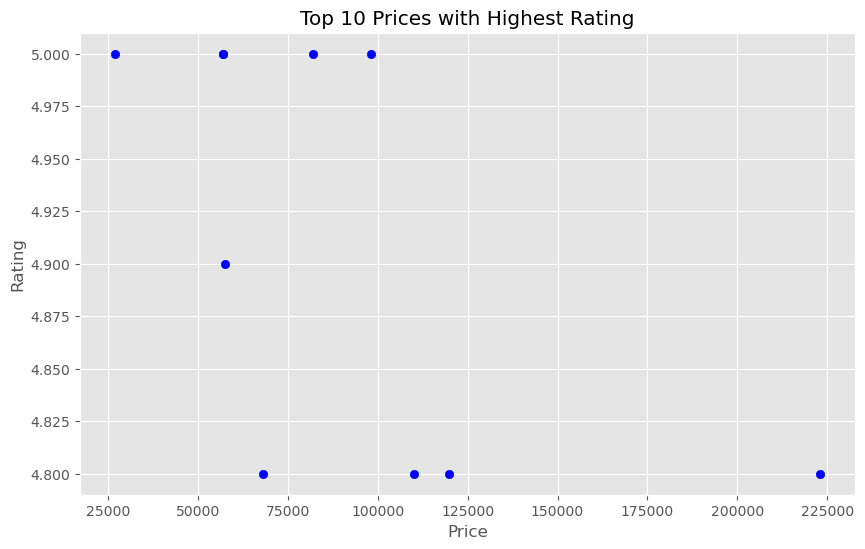

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_prices_highest_rating['Price'], top_10_prices_highest_rating['Rating'], color='blue')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Top 10 Prices with Highest Rating')
plt.grid(True)
plt.show()

 higher price products rating is so high so the quality of high products is high.

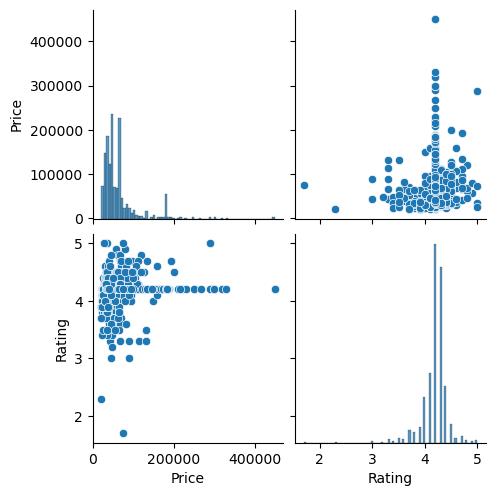

In [69]:
numerical_columns = ['Price', 'Rating']

# Creating a pairplot
sns.pairplot(df[numerical_columns])
plt.show()

In [70]:
df.corr()

C:\Users\DX\AppData\Local\Temp\ipykernel_11692\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Rating
Price,1.000000,0.137279
Rating,0.137279,1.000000


C:\Users\DX\AppData\Local\Temp\ipykernel_11692\874485724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

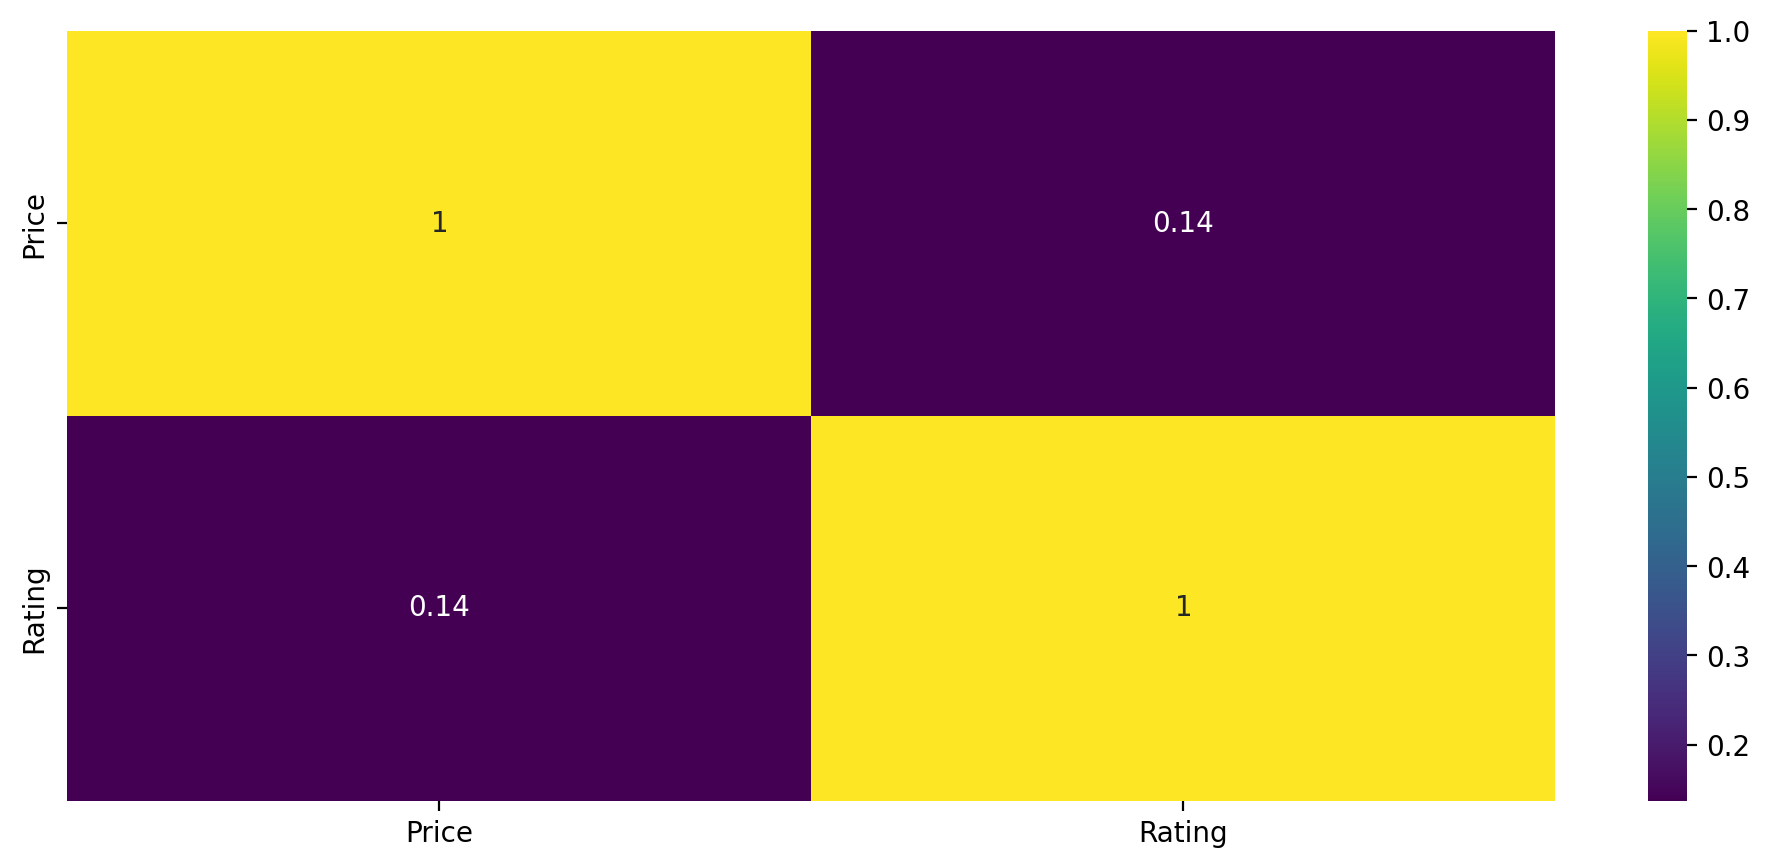

In [71]:
plt.figure(figsize =(12,5), dpi =200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')